<h1 class="edatitle" style="
    font-family: 'Orbitron', sans-serif;
    font-size: 4rem;
    color: #fff;
    text-align: center;
    letter-spacing: 0.1em;
    text-shadow: 0 4px 24px #3c2f54ff, 0 2px 8px #3d75c3ff;
    margin: 0;
    background: linear-gradient(135deg, #2e6579ff 0%rgba(55, 41, 185, 1)b9 50%, #5a2564ff 100%);
    padding: 1rem 0;
">
    EDA BASICS
</h1>


# Handling Missing Values

## we can handle missing values by using deletion or imputation
refer notes pg 48

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv(f"/Users/gabi/Desktop/DA_practice/Datasets/fifa_eda.csv")
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

## DENSITY PLOT (KDE)
A density plot, also known as a Kernel Density Estimate (KDE), is a smooth curve that shows the distribution of a continuous variable. Unlike a histogram, which uses discrete bins, KDE estimates the probability density function of the variable, making it easier to visualize the underlying distribution and spot patterns such as skewness or multimodality. In the previous cell, the `kde=True` argument in `sns.histplot` overlays the KDE curve on the histogram of player ages, providing a clearer view of how ages are distributed in the dataset.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


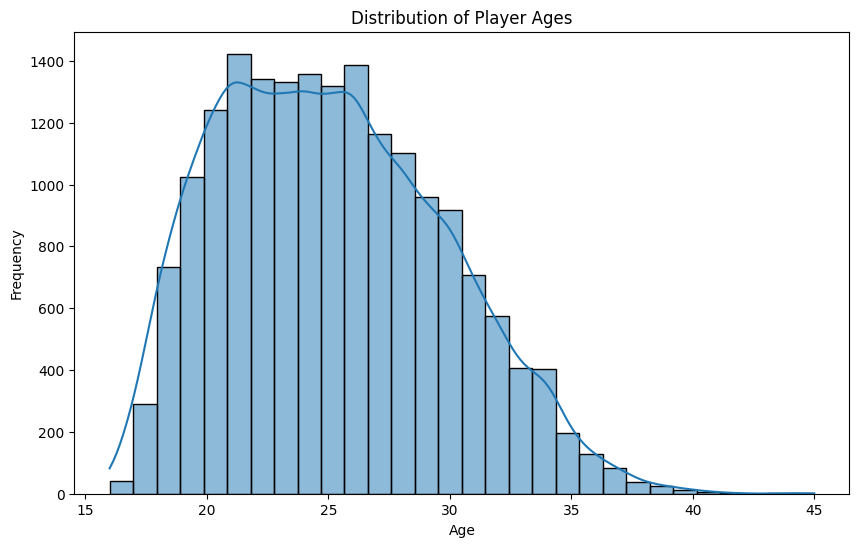

In [4]:
#histogram of age
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Rug Plot

A rug plot is a simple visualization that displays individual data points along an axis, typically as small vertical lines ("rugs") at the bottom of a plot. It is useful for showing the distribution and density of data, especially when combined with other plots like histograms or KDEs. In exploratory data analysis, rug plots help to identify clusters, gaps, and outliers in the data by providing a clear view of where each observation lies. Rug plots are often used in conjunction with seaborn's `sns.rugplot()` function.

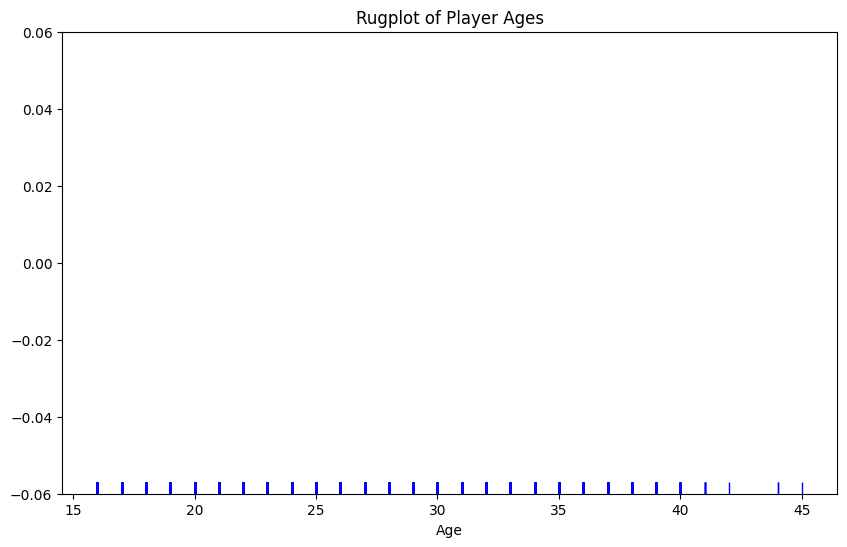

In [5]:
#rugplot data
plt.figure(figsize=(10,6))
sns.rugplot(data['Age'], color='blue')
plt.title('Rugplot of Player Ages')
plt.xlabel('Age')
plt.show()

# CDF
The cumulative distribution function (CDF) describes the probability that a random variable takes a value less than or equal to a specific value. For a given value x, the CDF gives the proportion of data points in the dataset that are less than or equal to x. In exploratory data analysis, plotting the CDF helps visualize how data accumulates and can reveal information about the distribution, such as skewness, percentiles, and outliers. CDF plots are useful for comparing distributions and understanding the likelihood of observing values within certain ranges.

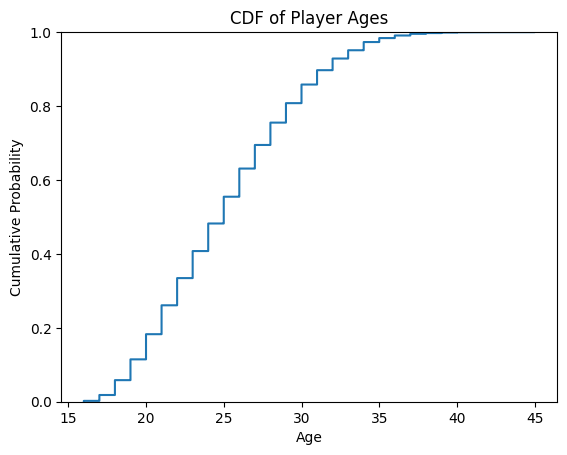

In [6]:
#cdf for the data
sns.ecdfplot(data['Age'])
plt.title('CDF of Player Ages')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.show()

## SCATTERplot
A scatterplot is a type of data visualization that displays individual data points as dots on a two-dimensional graph. Each point represents the values of two variables, with one variable plotted along the x-axis and the other along the y-axis. Scatterplots are useful for identifying relationships, patterns, and correlations between variables, as well as spotting outliers and clusters in the data. In exploratory data analysis, scatterplots help to visually assess whether variables are linearly related, independent, or have more complex associations.

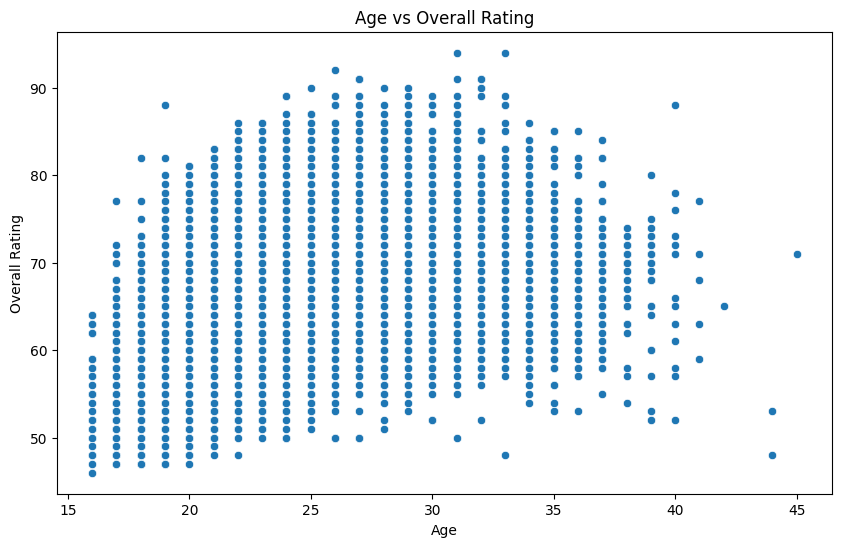

In [7]:
##scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Overall', data=data)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

# Pairplot (scatter matrix)
A pairplot (scatter matrix) is a grid of scatterplots that visualizes the relationships between multiple numerical variables in a dataset. Each cell in the grid shows the scatterplot between two variables, while the diagonal often displays the distribution (histogram or KDE) of each variable. Pairplots are useful for quickly spotting correlations, clusters, and outliers, and for understanding the overall structure of the data. In seaborn, the `sns.pairplot()` function creates pairplots easily, allowing you to explore interactions between features in your dataframe.


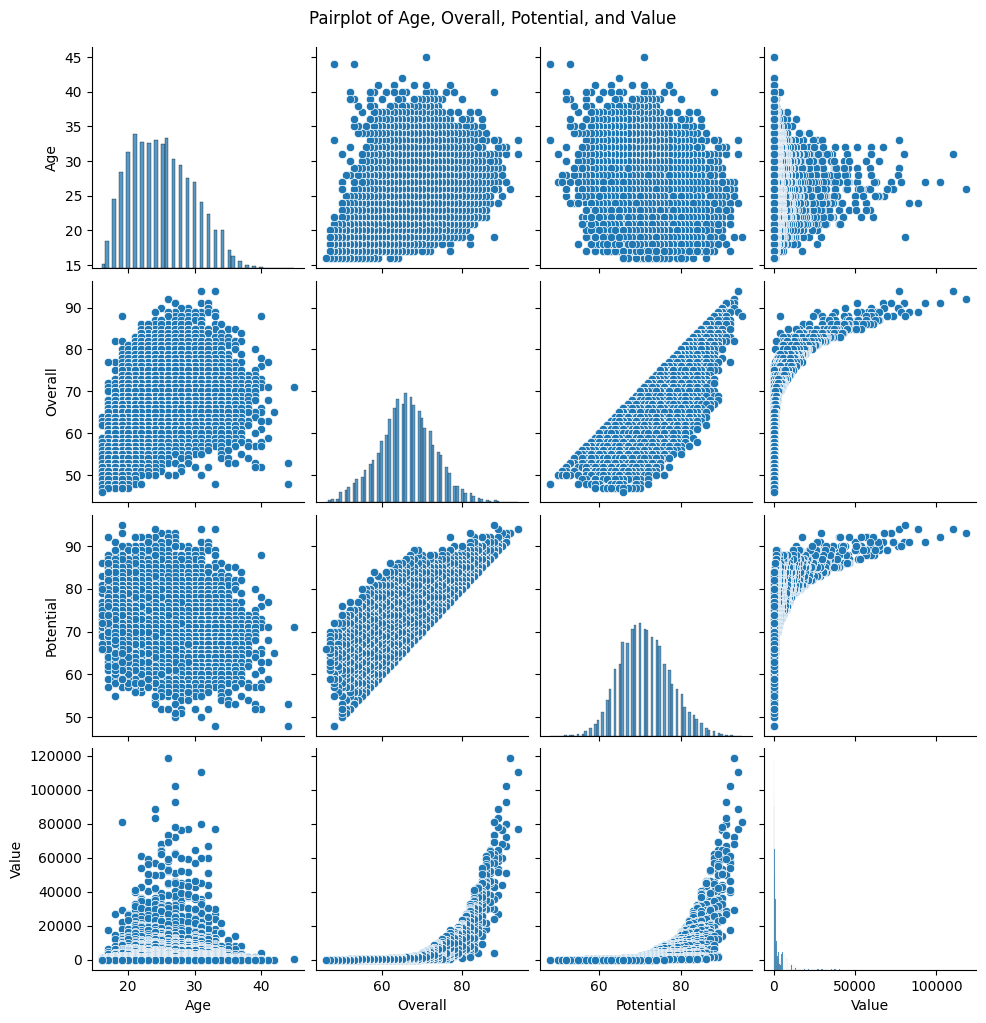

In [8]:
#pairplot (scatter matrix)
sns.pairplot(data[['Age', 'Overall', 'Potential', 'Value']])
plt.suptitle('Pairplot of Age, Overall, Potential, and Value', y=1.02)
plt.show()

## Bubble Chart

A bubble chart is a type of data visualization that extends the scatterplot by incorporating a third dimension through the size of the bubbles. Each bubble represents a data point, with its position on the x and y axes determined by two variables, and its size representing a third variable (often a quantitative measure like population or value). Bubble charts are useful for exploring relationships between multiple variables, identifying clusters, correlations, and outliers, and comparing categories or groups. They provide a compact way to display complex data, making them ideal for exploratory data analysis. In libraries like matplotlib or seaborn, bubble charts can be created using scatterplots with the `s` parameter for size.

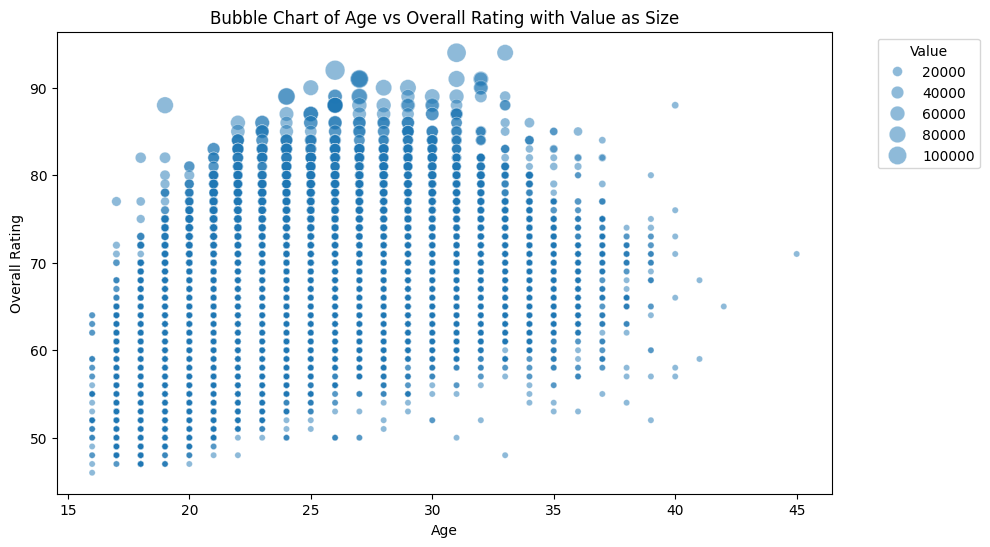

In [9]:
#bubble chart 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Overall', size='Value', data=data, sizes=(20, 200), alpha=0.5)
plt.title('Bubble Chart of Age vs Overall Rating with Value as Size')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Hexbin Plot

A hexbin plot is a type of bivariate data visualization that uses hexagonal bins to represent the density of data points in a two-dimensional space. Unlike scatterplots, which can become cluttered with overlapping points, hexbin plots aggregate data into hexagonal cells and color-code them based on the number of points in each bin, making it easier to identify areas of high and low density. This is particularly useful for large datasets where traditional scatterplots might be hard to interpret. In libraries like matplotlib, hexbin plots can be created using the `plt.hexbin()` function, which helps in exploratory data analysis by revealing patterns, correlations, and distributions between two continuous variables.

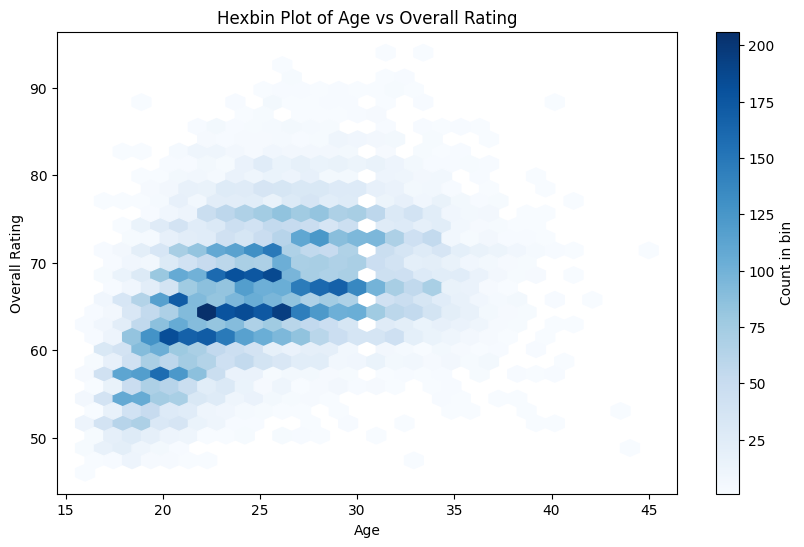

In [14]:
#hexbin plot
plt.figure(figsize=(10,6))
plt.hexbin(data['Age'], data['Overall'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Hexbin Plot of Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

## Strip Plot

A strip plot is a type of data visualization that displays individual data points as dots along an axis, typically used to show the distribution of a continuous variable across categories. Each dot represents a single observation, and they are jittered (slightly spread out) to avoid overlap, making it easier to see the density and spread of data points. Strip plots are particularly useful in exploratory data analysis for comparing distributions across groups, identifying outliers, and visualizing the relationship between a categorical variable and a numerical one. In seaborn, the `sns.stripplot()` function creates strip plots, often combined with other plots like box plots for enhanced insights. For example, in the FIFA dataset, a strip plot could illustrate how player ages vary by position or nationality.

In [ ]:
#strip plot